# STAT207 Mini-Project #2 - NBA Total Game Stats

Om Patel (opate22)

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [1]:
#Imports here
import pandas as pd     # imports pandas and calls the imported version 'pd'
import numpy as np
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  


## 1. Introduction

## Motivation
Basketball is a fast-paced, competitive game with rich data, and every game generates thousands of statistics. Every game of basketball has changed its play style as generations changed. This project aims to predict how many points an NBA team will score in a game based on various in-game performance metrics. This is important for team managers, players, coaches, and the organization. Utilizing the predictive model for the points scored in a game based on in-game metrics can help teams develop new strategies for offense and defense. Predicting the number of points an NBA team can score based on field goals made, personal fouls, assists, rebounds, and free throws can help get insight into opponents' strengths and weaknesses. The secondary objective is to find relative essential features that contribute the most to scoring output. This can help the team create more defensive-style strategies against their opponents. This information is not only beneficial to the NBA team but also to broadcasters, fantasy sports, and sports betters.

## Research Question
1. Predict how many points an NBA team will score in a game using in-game performance metrics like field goals made, personal fouls, assists, rebounds, and free throws.

2. Which in-game metrics contribute the most to a team's scoring output, and how can this information help teams develop better offensive and defensive strategies?


## 2. Dataset Discussion

For this analysis, I use a dataset titled NBA Games Total Stats from Kaggle by Mustafa Er. This dataset contains team-level insight statistics from NBA games spanning multiple seasons from 2016 to early 2024. The dataset includes a wide range of in-game performance metrics such as field goals made, personal fouls, assists, rebounds, free throws, and total points scored per team per game. The original dataset contains 20586 rows and 98 columns, representing the NBA team's performance in specific games. The dataset includes numerical, categorical, and boolean values. This dataset is well suited for this project because it has all the numerical responses needed to predict the number of points an NBA team will score based on in-game metrics. Downloaded on March 30th 2025, https://www.kaggle.com/datasets/aski1140/nba-games-total-stats 

In [2]:
nba_df = pd.read_csv('nba_games.csv', encoding = 'utf-8')
nba_df.head(5)

C:\Users\ompat\AppData\Local\Temp\ipykernel_15184\823785718.py:1: DtypeWarning: Columns (27,74) have mixed types. Specify dtype option on import or set low_memory=False.
  nba_df = pd.read_csv('nba_games.csv', encoding = 'utf-8')


,Unnamed: 0,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,...,player_7_name_opp,player_8_name_opp,player_9_name_opp,player_10_name_opp,team_opp,total_opp,home_opp,season,date,won
0,0,240,37,96,0.385,12,29,0.414,20,26,...,Thabo Sefolosha,Lamar Patterson,Tiago Splitter,Mike Muscala,ATL,94,1,2016,2015-10-27,True
1,1,240,37,82,0.451,8,27,0.296,12,15,...,Steve Blake,Jodie Meeks,Aron Baynes,Darrun Hilliard,DET,106,0,2016,2015-10-27,False
2,2,240,38,94,0.404,9,29,0.310,10,17,...,Joakim Noah,Doug McDermott,Aaron Brooks,E'Twaun Moore,CHI,97,1,2016,2015-10-27,False
3,3,240,37,87,0.425,7,19,0.368,16,23,...,Matthew Dellavedova,Richard Jefferson,Anderson Varejão,James Jones,CLE,95,0,2016,2015-10-27,True
4,4,240,35,83,0.422,6,18,0.333,19,27,...,Shaun Livingston,Leandro Barbosa,Festus Ezeli,Marreese Speights,GSW,111,1,2016,2015-10-27,False


In [3]:
nba_df.shape[0]

20586

## 3. Dataset Cleaning

This dataset was clean, besides the extra index positions converted from Excel to CSV. Besides that, there was no necessary dataset cleaning to be done. All rows have the correct data types and metrics in the dataset by looking at the .dtypes for any implicit cleaning and ensuring no explicit cleaning was needed by doing .isna().sum. Since we are looking at in-game metrics to predict how many points an NBA team will expect, we can select the features we are interested in, create a new data frame, and start the analysis. Our research goal is to predict how many points an NBA team will score in a game using in-game performance metrics like field goals made, personal fouls, assists, rebounds, and free throws. We could create a new data frame with the following columns and rows of data to help predict pts: points and NBA scores in a game. 
We can create a data frame on the following explanatory variables: 
1. fg: field goals made
2. pf: personal foul
3. ast: assist
4. trb: rebounds both offensively and defensively
5. ft: free throws

In [4]:
nba_df.columns

Index(['Unnamed: 0', 'mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta',
       'ft%', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
       '+/-', 'ts%', 'efg%', '3par', 'ftr', 'orb%', 'drb%', 'trb%', 'ast%',
       'stl%', 'blk%', 'tov%', 'usg%', 'ortg', 'drtg', 'player_1_name',
       'player_2_name', 'player_3_name', 'player_4_name', 'player_5_name',
       'player_6_name', 'player_7_name', 'player_8_name', 'player_9_name',
       'player_10_name', 'team', 'total', 'home', 'mp_opp', 'fg_opp',
       'fga_opp', 'fg%_opp', '3p_opp', '3pa_opp', '3p%_opp', 'ft_opp',
       'fta_opp', 'ft%_opp', 'orb_opp', 'drb_opp', 'trb_opp', 'ast_opp',
       'stl_opp', 'blk_opp', 'tov_opp', 'pf_opp', 'pts_opp', '+/-_opp',
       'ts%_opp', 'efg%_opp', '3par_opp', 'ftr_opp', 'orb%_opp', 'drb%_opp',
       'trb%_opp', 'ast%_opp', 'stl%_opp', 'blk%_opp', 'tov%_opp', 'usg%_opp',
       'ortg_opp', 'drtg_opp', 'player_1_name_opp', 'player_2_name_opp',
       'player_3_name_opp', 'pl

In [5]:
nba_df.isna().sum()

Unnamed: 0    0
mp            0
fg            0
fga           0
fg%           0
             ..
total_opp     0
home_opp      0
season        0
date          0
won           0
Length: 98, dtype: int64

In [6]:
nba_df.dtypes

Unnamed: 0      int64
mp              int64
fg              int64
fga             int64
fg%           float64
               ...   
total_opp       int64
home_opp        int64
season          int64
date           object
won              bool
Length: 98, dtype: object

In [7]:
nba_df2 = nba_df[['fg', 'pf', 'ast', 'trb', 'ft', 'pts']].dropna()
nba_df2

,fg,pf,ast,trb,ft,pts
0,37,15,23,59,20,106
1,37,25,22,40,12,94
2,38,21,26,50,10,95
3,37,22,13,47,16,97
4,35,26,21,33,19,95
...,...,...,...,...,...,...
20581,45,22,27,49,22,126
20582,41,20,21,31,20,117
20583,40,24,27,38,14,102
20584,49,26,31,38,16,128


## 4. Preliminary Analysis

I began looking at multicollinearity within the cleaned dataset with the explanatory variables. This is important because if features are highly correlated to another variable, it can cause a misleading representation of the prediction. I did this by finding the correlations between each explanatory variable and creating a heat map representing the correlation between them. Most variables showed a relatively symmetric distribution between and a linear relationship with the predictive variables pts. One pair caused multicolilinearity; the points and field goal at 0.849820 which was expected due to its contribtion to scoring points. The general shape of the risidual model was genrally randomly spread out but had some minor violation in the lower fitted values. There was no need to transform any of the variables as most of the pairs were linear. 

To explore the interaction between the numerical predictors and game outcomes, I plotted each numerical variable against the response variable points, whether the result of a game was a win or a loss ( 0 = loss, 1 = win). The most noticeable interaction was the field goals and pts that won the game because the slopes of the teams that won were steeper than for the teams that lost. This insight suggests that field goals contribute more to total points in wins compared to losses. Other variables like assists and free throws showed a more parallel line across win categories, which suggests weak or no interaction effect on the number of points an NBA team scores in a match.

## Multicolinearity

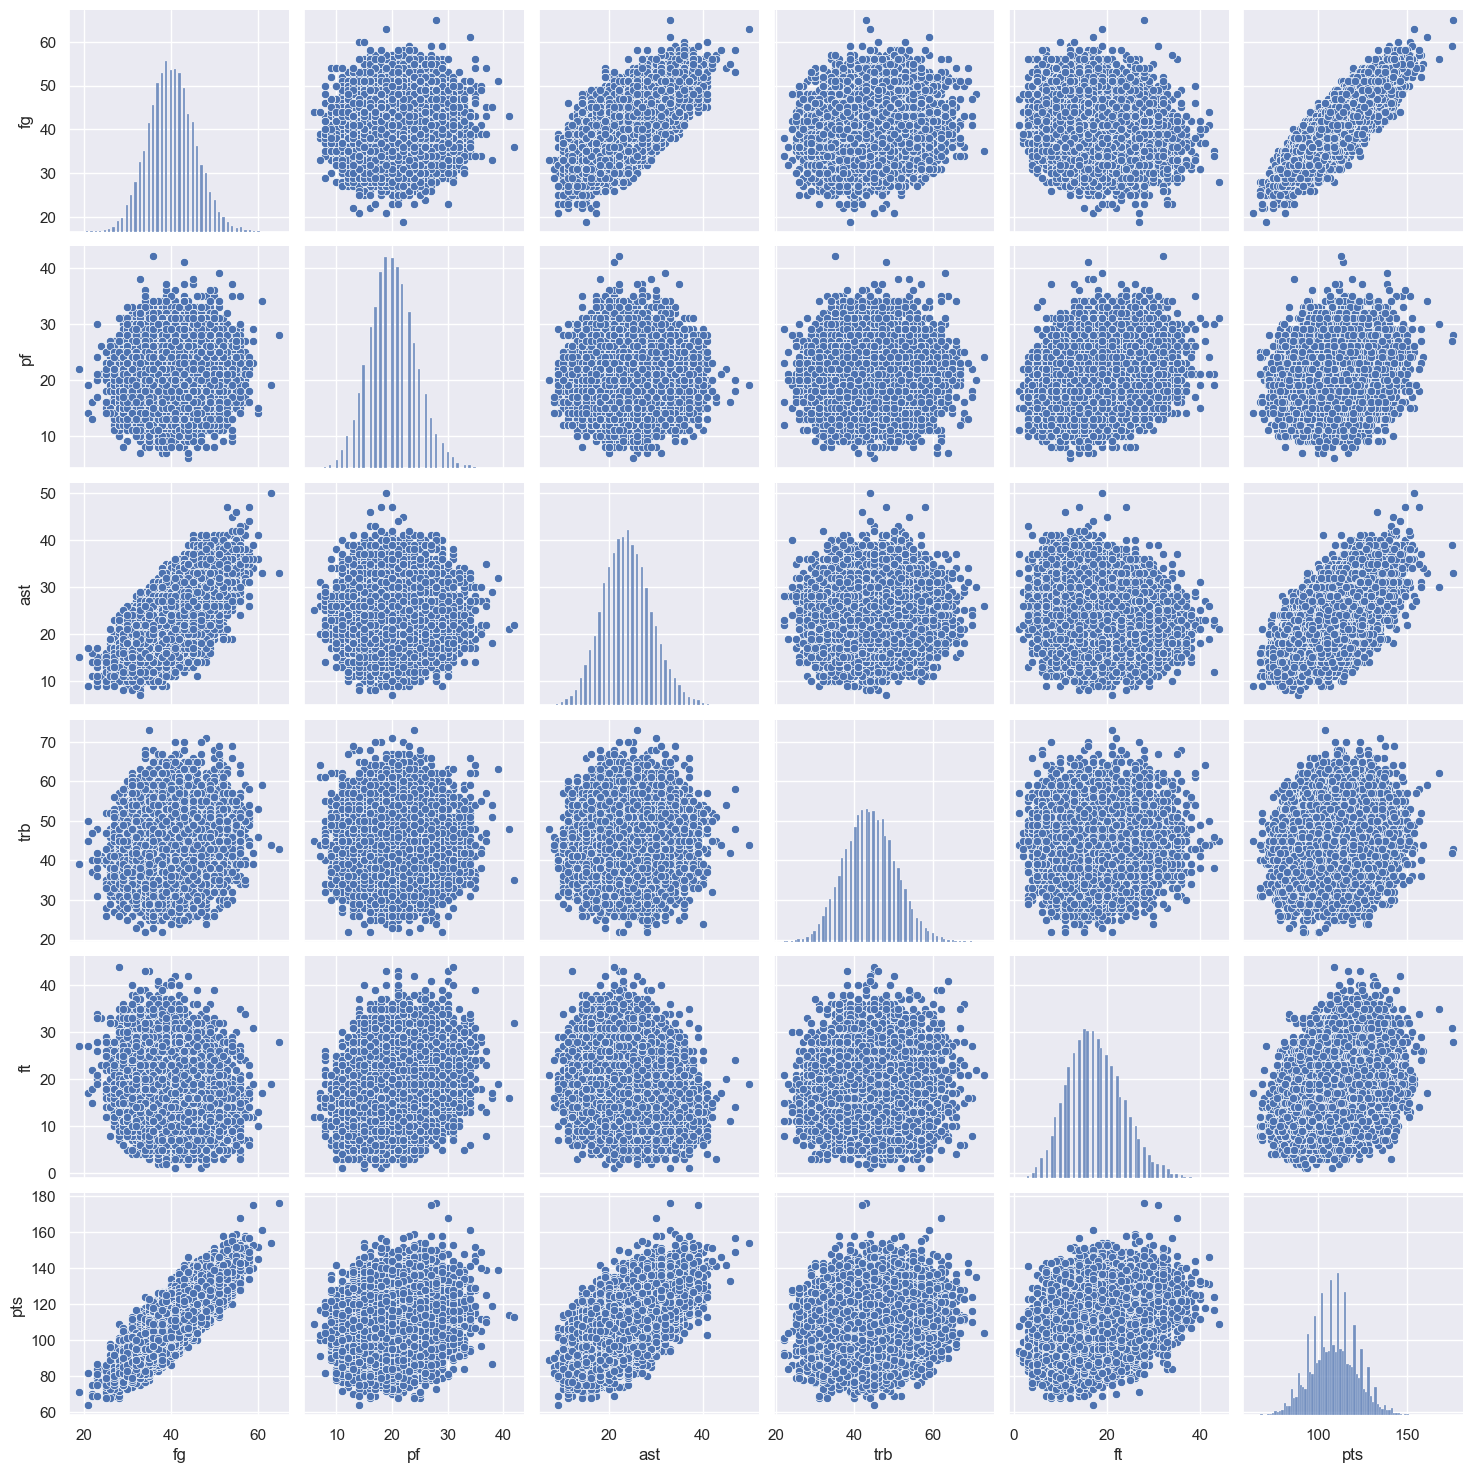

In [8]:
sns.pairplot(nba_df2)
plt.show()

In [9]:
nba_df2.corr()

,fg,pf,ast,trb,ft,pts
fg,1.000000,0.057248,0.647233,0.107637,-0.166253,0.849820
pf,0.057248,1.000000,0.010722,-0.000217,0.217922,0.158584
ast,0.647233,0.010722,1.000000,0.032710,-0.148637,0.598898
trb,0.107637,-0.000217,0.032710,1.000000,0.053834,0.113366
ft,-0.166253,0.217922,-0.148637,0.053834,1.000000,0.293233
pts,0.849820,0.158584,0.598898,0.113366,0.293233,1.000000


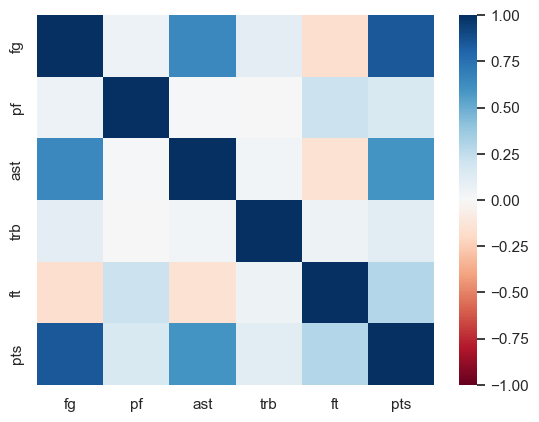

In [10]:
sns.heatmap(nba_df2.corr(), vmin = -1, vmax = 1, cmap = 'RdBu')
plt.show()

There is multicolinearity between fg and pts 0.849820

## Variable Transformations

In [11]:
import statsmodels.formula.api as smf 
nba_model = smf.ols(formula = 'pts~fg+ast+trb+ft+pf', data = nba_df2).fit()
nba_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pts   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 5.026e+04
Date:                Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:29:51   Log-Likelihood:                -55214.
No. Observations:               20586   AIC:                         1.104e+05
Df Residuals:                   20580   BIC:                         1.105e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4006      0.273      5.139      0.000       0.866       1.935
fg             2.0817      0.006    332.418      0.000       2.069       2.094
ast            0.2886      0.006     45.960      0.000       0.276       0.301
trb           -0.0119      0.004     -3.140      0.002      -0.019      -0.004
ft             0.9711      0.004    224.094      0.000       0.963       0.980
pf             0.0325      0.006      5.417      0.000       0.021       0.044
==============================================================================
Omnibus:                      260.441   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.145
Skew:                           0.278   Prob(JB):                     2.18e-59
Kurtosis:                       3.077   Cond. No.                         773.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

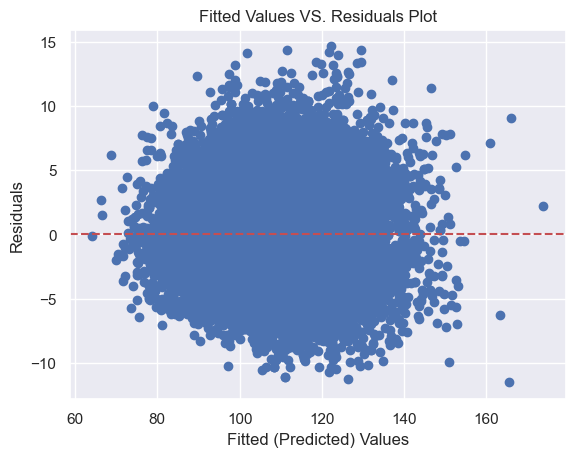

In [12]:
plt.scatter(nba_model.fittedvalues, nba_model.resid)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Fitted (Predicted) Values')
plt.ylabel('Residuals')
plt.title('Fitted Values VS. Residuals Plot')
plt.show()

## Interaction Terms

In [52]:
nba_df3 = nba_df[['fg', 'pf', 'ast', 'trb', 'ft', 'pts', 'won']].dropna()
nba_df3

,fg,pf,ast,trb,ft,pts,won
0,37,15,23,59,20,106,True
1,37,25,22,40,12,94,False
2,38,21,26,50,10,95,False
3,37,22,13,47,16,97,True
4,35,26,21,33,19,95,False
...,...,...,...,...,...,...,...
20581,45,22,27,49,22,126,True
20582,41,20,21,31,20,117,True
20583,40,24,27,38,14,102,False
20584,49,26,31,38,16,128,False


<Figure size 1400x800 with 0 Axes>

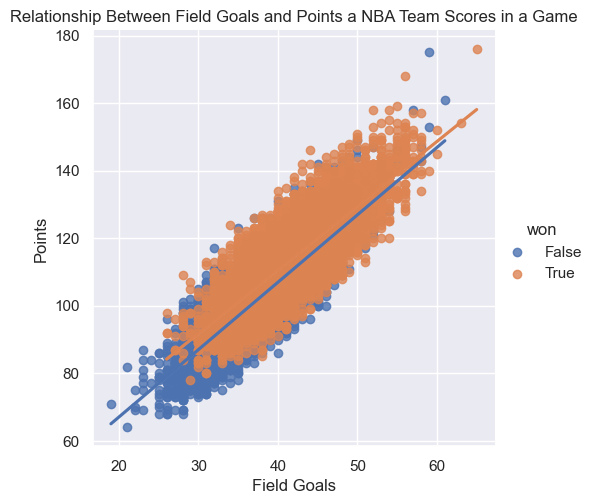

In [14]:
plt.figure(figsize = (14,8))
sns.lmplot(x = 'fg', y = 'pts', hue ='won', ci=False, data = nba_df3)
plt.title('Relationship Between Field Goals and Points a NBA Team Scores in a Game')
plt.xlabel('Field Goals')
plt.ylabel('Points')
plt.show()

<Figure size 1400x800 with 0 Axes>

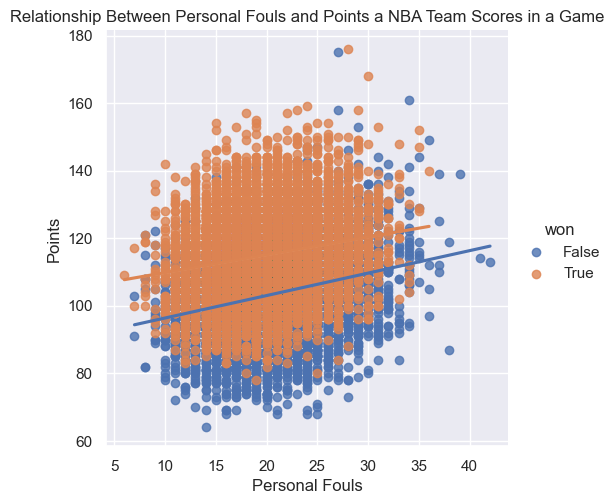

In [15]:
plt.figure(figsize = (14,8))
sns.lmplot(x = 'pf', y = 'pts', hue ='won', ci=False, data = nba_df3)
plt.title('Relationship Between Personal Fouls and Points a NBA Team Scores in a Game')
plt.xlabel('Personal Fouls')
plt.ylabel('Points')
plt.show()

<Figure size 1400x800 with 0 Axes>

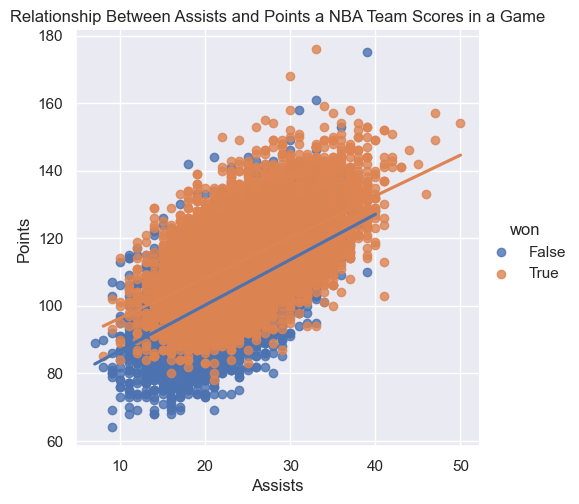

In [54]:
plt.figure(figsize = (14,8))
sns.lmplot(x = 'ast', y = 'pts', hue ='won', ci=False, data = nba_df3)
plt.title('Relationship Between Assists and Points a NBA Team Scores in a Game')
plt.xlabel('Assists')
plt.ylabel('Points')
plt.show()

<Figure size 1400x800 with 0 Axes>

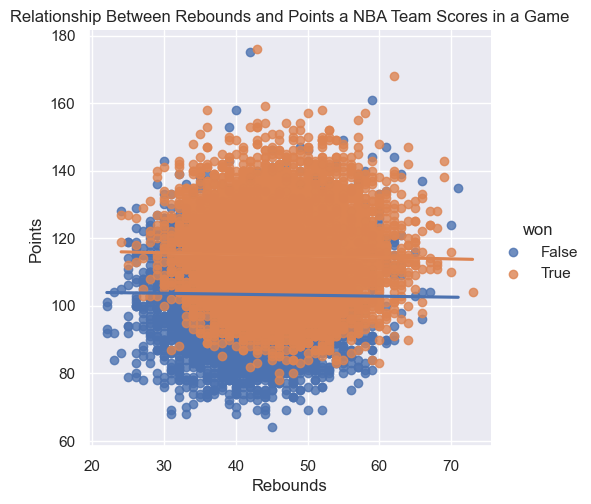

In [17]:
plt.figure(figsize = (14,8))
sns.lmplot(x = 'trb', y = 'pts', hue ='won', ci=False, data = nba_df3)
plt.title('Relationship Between Rebounds and Points a NBA Team Scores in a Game')
plt.xlabel('Rebounds')
plt.ylabel('Points')
plt.show()

<Figure size 1400x800 with 0 Axes>

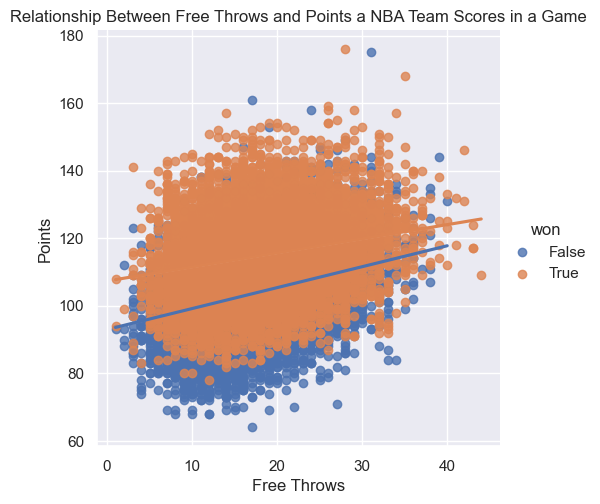

In [18]:
plt.figure(figsize = (14,8))
sns.lmplot(x = 'ft', y = 'pts', hue ='won', ci=False, data = nba_df3)
plt.title('Relationship Between Free Throws and Points a NBA Team Scores in a Game')
plt.xlabel('Free Throws')
plt.ylabel('Points')
plt.show()

## 5. Predictive Models

I created a train test split method for the predictive model where I used the cleaned NBA dataset, and the chosen five explanatory variables were trained at 80% and tested at 20%. Since none of the explanatory variables I chose were categorical and all numerical, there was no need to convert them to 0/1. The only categorical variable we used was the interaction variable 'won' to see if our chosen explanatory variables resulted in a win or loss in the NBA matchups. I then standardized the variables with the z-score in the training and test dataset to see which explanatory variable brings the most predictive power to the response variable. I then used the train test split to create three different models to see which one could predict the number of points scored by an NBA team using the explanatory variables. 

The first model I fit was a non-regularized linear regression full model using all five explanatory variables not inclduing the interaction term. The non-regularized model got a test r-squared of 0.9205956054306157, meaning about 92.06% (rounded) of the time; it will explain a large portion of the variability of the number of points scored in an NBA game using the selected features. The second model I used was to create a full model with the most substantial interaction term from section 4. In section 4, I observed that field goals and whether teams won or lost contributed most to the amount of points. The teams that won had a steeper slope in field goals, indicating field goal contributions more significantly to total points in games where teams have resulted in a win. This interaction term makes sense because the more field goal points taken in a basketball game, the more points taken. To account for this interaction, I created a new variable called fg_won, where I multiplied the field goals by the wins and losses. I then used this and the other five variables to get a test r-squared of 0.9222802594544943 (92.23%). I then decided to see which explanatory variable brings the most predictive power by conducting a backward elimination method. I used the full model with all five explanatory variables and deleted them from the model one by one to see if I could generate a better test r-squared. The original test r-squared was 0.920550950624822, and the highest test r-squared I got after removing total rebounds (trb) was 0.9205058332640863. Since eliminating none of the variables increased the test r-squared, the interaction model with fg_won produced the highest r-squared, making it the best-performing model. 

In [19]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(nba_df2, test_size = 0.2, random_state = 207)
df_train.head()

,fg,pf,ast,trb,ft,pts
10663,45,21,21,36,19,128
7318,44,14,25,44,13,114
20260,35,22,23,50,18,101
4942,34,19,11,40,17,90
20510,35,17,19,29,28,111


In [20]:
df_train.head()

,fg,pf,ast,trb,ft,pts
10663,45,21,21,36,19,128
7318,44,14,25,44,13,114
20260,35,22,23,50,18,101
4942,34,19,11,40,17,90
20510,35,17,19,29,28,111


In [21]:
df_test.head()

,fg,pf,ast,trb,ft,pts
232,42,23,26,33,8,102
11732,47,22,31,53,15,121
17888,45,20,22,46,20,118
17537,35,22,27,43,21,101
18972,39,21,22,40,12,102


In [22]:
X_train = df_train.drop(['pts'], axis = 1)
X_train.head()

,fg,pf,ast,trb,ft
10663,45,21,21,36,19
7318,44,14,25,44,13
20260,35,22,23,50,18
4942,34,19,11,40,17
20510,35,17,19,29,28


In [23]:
X_test = df_test.drop(['pts'], axis = 1)
X_test.head()

,fg,pf,ast,trb,ft
232,42,23,26,33,8
11732,47,22,31,53,15
17888,45,20,22,46,20
17537,35,22,27,43,21
18972,39,21,22,40,12


In [24]:
y_train = df_train['pts']
y_train.head()

10663    128
7318     114
20260    101
4942      90
20510    111
Name: pts, dtype: int64

In [25]:
y_test = df_test['pts']
y_test.head()

232      102
11732    121
17888    118
17537    101
18972    102
Name: pts, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler 

scaler_training = StandardScaler()
scaled_expl_vars = scaler_training.fit_transform(X_train)

X_train = pd.DataFrame(scaled_expl_vars, columns = X_train.columns)
X_train.head()

,fg,pf,ast,trb,ft
0,0.911185,0.199014,-0.556890,-1.222952,0.243887
1,0.720865,-1.455859,0.220104,-0.007858,-0.761705
2,-0.992015,0.435424,-0.168393,0.903463,0.076289
3,-1.182335,-0.273807,-2.499377,-0.615405,-0.091310
4,-0.992015,-0.746628,-0.945388,-2.286160,1.752276


In [27]:

scaled_expl_vars = scaler_training.fit_transform(X_test)

X_test = pd.DataFrame(scaled_expl_vars, columns = X_test.columns)
X_test.head()

,fg,pf,ast,trb,ft
0,0.342607,0.697545,0.403584,-1.675138,-1.604998
1,1.301460,0.461437,1.359282,1.372048,-0.418090
2,0.917919,-0.010779,-0.360974,0.305533,0.429701
3,-0.999787,0.461437,0.594724,-0.151545,0.599260
4,-0.232705,0.225329,-0.360974,-0.608623,-0.926765


In [28]:
X_train.corr()

,fg,pf,ast,trb,ft
fg,1.000000,0.058255,0.646481,0.102911,-0.169680
pf,0.058255,1.000000,0.012576,0.012017,0.221191
ast,0.646481,0.012576,1.000000,0.028754,-0.146491
trb,0.102911,0.012017,0.028754,1.000000,0.061612
ft,-0.169680,0.221191,-0.146491,0.061612,1.000000


In [29]:
X_test.corr()

,fg,pf,ast,trb,ft
fg,1.000000,0.053216,0.650363,0.126746,-0.152296
pf,0.053216,1.000000,0.003528,-0.049417,0.204520
ast,0.650363,0.003528,1.000000,0.048361,-0.157192
trb,0.126746,-0.049417,0.048361,1.000000,0.022184
ft,-0.152296,0.204520,-0.157192,0.022184,1.000000


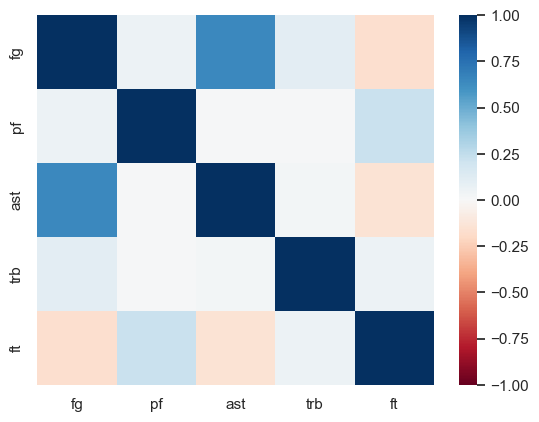

In [30]:
sns.heatmap(X_train.corr(), vmin = -1, vmax = 1, cmap = 'RdBu')
plt.show()

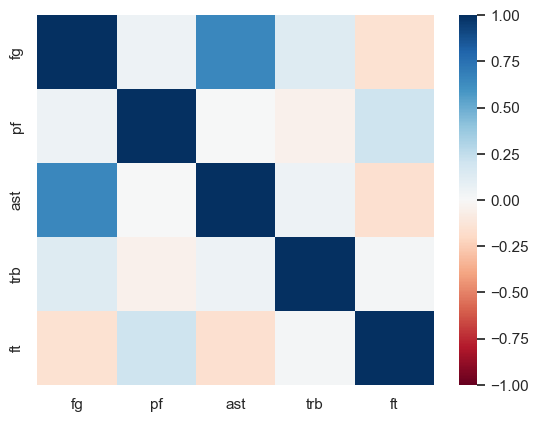

In [31]:
sns.heatmap(X_test.corr(), vmin = -1, vmax = 1, cmap = 'RdBu')
plt.show()

## Section 5.1 Fitting a non-regularized linear regression model

In [32]:
from sklearn.linear_model import LinearRegression 
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)

LinearRegression()

In [33]:
lin_reg_mod.score(X_test, y_test)


np.float64(0.9205956054306157)

In [34]:
0.9205956054306157 * 100

92.05956054306156

In [35]:
lin_reg_mod.intercept_

np.float64(109.15769978139421)

In [36]:
non_reg_slopes = pd.DataFrame(lin_reg_mod.coef_.T, columns = ['lin_reg_mod'], index = X_train.columns)
non_reg_slopes.sort_values(by = ['lin_reg_mod'])

,lin_reg_mod
trb,-0.075558
pf,0.137522
ast,1.495780
ft,5.786527
fg,10.911796


## 5.2. Non-Regularized Linear Regression Full Model with Interaction Terms

In [37]:
#nba_df3['fg_won'] = nba_df3['fg'] * nba_df3['won'].astype(int)
#nba_df3['fg_won']


In [38]:
nba_df3

,fg,pf,ast,trb,ft,pts,won
0,37,15,23,59,20,106,True
1,37,25,22,40,12,94,False
2,38,21,26,50,10,95,False
3,37,22,13,47,16,97,True
4,35,26,21,33,19,95,False
...,...,...,...,...,...,...,...
20581,45,22,27,49,22,126,True
20582,41,20,21,31,20,117,True
20583,40,24,27,38,14,102,False
20584,49,26,31,38,16,128,False


In [39]:
df_train, df_test = train_test_split(nba_df3, test_size=0.2, random_state=207)

X_train = df_train.drop(['pts'], axis=1)
X_test = df_test.drop(['pts'], axis=1)
y_train = df_train['pts']
y_test = df_test['pts']

scaler = StandardScaler()
X_train_full = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_full = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [40]:
from sklearn.linear_model import LinearRegression

full_interaction_model = LinearRegression()
full_interaction_model.fit(X_train_full, y_train)
full_interaction_r2 = full_interaction_model.score(X_test_full, y_test)
full_interaction_r2

np.float64(0.9222802594544943)

In [41]:
0.9222802594544943 * 100

92.22802594544943

In [42]:
full_reg_slopes = pd.DataFrame(full_interaction_model.coef_.T, columns = ['full_interaction_model'], index = X_train.columns)
full_reg_slopes.sort_values(by = ['full_interaction_model'])

,full_interaction_model
trb,-0.211283
pf,0.223527
won,0.563810
ast,1.433043
ft,5.660764
fg,10.721852


In [43]:
full_interaction_model.intercept_

np.float64(109.15769978139421)

## Backwards Elimination

In [44]:
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
current_model = smf.ols(formula = 'pts~fg+ast+trb+pf+ft', data = nba_df2).fit()
r2_score(df_test['pts'], current_model.predict(df_test))

np.float64(0.920550950624822)

## Iteration 1

In [45]:
# no ft
test_model = smf.ols(formula = 'pts~fg+ast+trb+pf', data = nba_df2).fit()
r2_score(df_test['pts'], test_model.predict(df_test))

np.float64(0.7379687139120228)

In [46]:
# no pf
test_model = smf.ols(formula = 'pts~fg+ast+trb+ft', data = nba_df2).fit()
r2_score(df_test['pts'], test_model.predict(df_test))

np.float64(0.9204433947857726)

In [47]:
# not trb
test_model = smf.ols(formula = 'pts~fg+ast+pf+ft', data = nba_df2).fit()
r2_score(df_test['pts'], test_model.predict(df_test))

np.float64(0.9205058332640863)

In [48]:
# no ast
test_model = smf.ols(formula = 'pts~fg+trb+pf+ft', data = nba_df2).fit()
r2_score(df_test['pts'], test_model.predict(df_test))

np.float64(0.9131993725252319)

In [49]:
# no fg
test_model = smf.ols(formula = 'pts~ast+trb+pf+ft', data = nba_df2).fit()
r2_score(df_test['pts'], test_model.predict(df_test))

np.float64(0.5194750604838894)

In [50]:
final_model = smf.ols(formula = 'pts~fg+ast+trb+pf+ft', data = nba_df2).fit()
r2_score(df_test['pts'], current_model.predict(df_test))

np.float64(0.920550950624822)

In [51]:
0.920550950624822 * 100

92.0550950624822

## 6. Best Model Discussion

The best predictive model I found was the linear regression that included all five original explanatory variables and the interaction term between field goals and the win status of the game. This model achieved the highest test r-squared of 0.9222802594544943, explaining about 92.23% of the variations in points scored on new data. This is a substantial test r-squared with all five original variables, which performed better with the interaction term. It does not appear that any original explanatory variables caused the models to overfit. Removing any explanatory variable during the backward elimination method reduced the test r-squared, indicating that all five explanatory variables contributed to the model performance. 

Equation: (predicted)  pts ^ = 109.15769978139421 + (-0.211283 trb) + (0.223527 pf) + (0.563810 won) + (1.433043 ast) + (5.660764 ft) + (10.721852 fg)

As for multicollinearity, there are mild correlations between the explanatory variables, precisely field goal and assist, at 0.650363. Since all the variables did not show much collinearity between each other, the model performed well, and multicollinearity was not a significant issue in the interaction model. The slopes of the explanatory variables are on the same scale because they were all z-scores standardized. The magnitude of the slope coefficients indicates how much predictive power each variable contributes to predicting the number of points scored. Based on the interaction model, field goal brings the most predictive power, indicating it is an essential predictor of scoring. 

## 7. Conclusion

In conclusion, I recommend this model to an NBA team because they can use the data from previous games against another team and predict the total number of possible points scored in a match using in-game metrics. The NBA teams, managers, coaches, and players can all use the data to develop strategies to lower the total points scored, making it harder for the opponent to score more. I have the best model for predicting NBA scores using in-game metrics. Even though there are other in-game metrics, I chose the most ideal and representative of basketball games. If I used another technique to find the highest test r-squared, I would use the lasso model to find a good lambda value. One shortcoming of this project is that it only predicts the final possible scores each NBA team can score with in-game metrics. Even though that is insightful data, it would be more insightful if each player's analytics were also a part of the prediction to get an average score instead of a wide range because basketball revolves around how the players perform. For future work, find each player's statistics and create a prediction on the game's final score with player statistics and different playstyles to see how it can impact the game overall.




# Final Report

## Motivation
Basketball is a fast-paced, competitive game with rich data, and every game generates thousands of statistics. Every game of basketball has changed its play style as generations changed. This project aims to predict how many points an NBA team will score in a game based on various in-game performance metrics. This is important for team managers, players, coaches, and the organization. Utilizing the predictive model for the points scored in a game based on in-game metrics can help teams develop new strategies for offense and defense. Predicting the number of points an NBA team can score based on field goals made, personal fouls, assists, rebounds, and free throws can help get insight into opponents' strengths and weaknesses. The secondary objective is to find relative essential features that contribute the most to scoring output. This can help the team create more defensive-style strategies against their opponents. This information is not only beneficial to the NBA team but also to broadcasters, fantasy sports, and sports betters.

## Research Question
1. Predict how many points an NBA team will score in a game using in-game performance metrics like field goals made, personal fouls, assists, rebounds, and free throws.

2. Which in-game metrics contribute the most to a team's scoring output, and how can this information help teams develop better offensive and defensive strategies?

For this analysis, I use a dataset titled NBA Games Total Stats from Kaggle by Mustafa Er. This dataset contains team-level insight statistics from NBA games spanning multiple seasons from 2016 to early 2024. The dataset includes a wide range of in-game performance metrics such as field goals made, personal fouls, assists, rebounds, free throws, and total points scored per team per game. The original dataset contains 20586 rows and 98 columns, representing the NBA team's performance in specific games. The dataset includes numerical, categorical, and boolean values. This dataset is well suited for this project because it has all the numerical responses needed to predict the number of points an NBA team will score based on in-game metrics. Downloaded on March 30th 2025, https://www.kaggle.com/datasets/aski1140/nba-games-total-stats 

This dataset was clean, besides the extra index positions converted from Excel to CSV. Besides that, there was no necessary dataset cleaning to be done. All rows have the correct data types and metrics in the dataset by looking at the .dtypes for any implicit cleaning and ensuring no explicit cleaning was needed by doing .isna().sum. Since we are looking at in-game metrics to predict how many points an NBA team will expect, we can select the features we are interested in, create a new data frame, and start the analysis. Our research goal is to predict how many points an NBA team will score in a game using in-game performance metrics like field goals made, personal fouls, assists, rebounds, and free throws. We could create a new data frame with the following columns and rows of data to help predict pts: points and NBA scores in a game. 
We can create a data frame on the following explanatory variables: 
1. fg: field goals made
2. pf: personal foul
3. ast: assist
4. trb: rebounds both offensively and defensively
5. ft: free throws

I began looking at multicollinearity within the cleaned dataset with the explanatory variables. This is important because if features are highly correlated to another variable, it can cause a misleading representation of the prediction. I did this by finding the correlations between each explanatory variable and creating a heat map representing the correlation between them. Most variables showed a relatively symmetric distribution between and a linear relationship with the predictive variables pts. One pair caused multicollinearity; the points and field goal were at 0.849820, which was expected due to its contribution to scoring points. The residual model's general shape was randomly spread out but had some minor violations in the lower fitted values. There was no need to transform any variables as most pairs were linear. 

To explore the interaction between the numerical predictors and game outcomes, I plotted each numerical variable against the response variable points, whether the result of a game was a win or a loss ( 0 = loss, 1 = win). The most noticeable interaction was the field goals and pts that won the game because the slopes of the teams that won were steeper than for the teams that lost. This insight suggests that field goals contribute more to total points in wins compared to losses. Other variables like assists and free throws showed a more parallel line across win categories, which suggests weak or no interaction effect on the number of points an NBA team scores in a match.

I created a train test split method for the predictive model where I used the cleaned NBA dataset, and the chosen five explanatory variables were trained at 80% and tested at 20%. Since none of the explanatory variables I chose were categorical and all numerical, there was no need to convert them to 0/1. The only categorical variable we used was the interaction variable 'won' to see if our chosen explanatory variables resulted in a win or loss in the NBA matchups. I then standardized the variables with the z-score in the training and test dataset to see which explanatory variable brings the most predictive power to the response variable. I then used the train test split to create three different models to see which one could predict the number of points scored by an NBA team using the explanatory variables. 

The first model I fit was a non-regularized linear regression full model using all five explanatory variables, not including the interaction term. The non-regularized model got a test r-squared of 0.9205956054306157, meaning about 92.06% (rounded) of the time; it will explain a large portion of the variability of the number of points scored in an NBA game using the selected features. The second model I used was to create a full model with the most substantial interaction term from section 4. In section 4, I observed that field goals and whether teams won or lost contributed most to the amount of points. The teams that won had a steeper slope in field goals, indicating field goal contributions more significantly to total points in games where teams have resulted in a win. This interaction term makes sense because the more field goal points taken in a basketball game, the more points taken. To account for this interaction, I created a new variable called fg_won, multiplying the field goals by the wins and losses. I then used this and the other five variables to get a test r-squared of 0.9222802594544943 (92.23%). I then decided to see which explanatory variable brings the most predictive power by conducting a backward elimination method. I used the full model with all five explanatory variables and deleted them from the model one by one to see if I could generate a better test r-squared. The original test r-squared was 0.920550950624822, and the highest test r-squared I got after removing total rebounds (trb) was 0.9205058332640863. Since eliminating none of the variables increased the test r-squared, the interaction model with fg_won produced the highest r-squared, making it the best-performing model. 

The best predictive model I found was the linear regression that included all five original explanatory variables and the interaction term between field goals and the win status of the game. This model achieved the highest test r-squared of 0.9222802594544943, explaining about 92.23% of the variations in points scored on new data. This is a substantial test r-squared with all five original variables, which performed better with the interaction term. It does not appear that any original explanatory variables caused the models to overfit. Removing any explanatory variable during the backward elimination method reduced the test r-squared, indicating that all five explanatory variables contributed to the model performance. 

Equation: (predicted)  pts ^ = 109.15769978139421 + (-0.211283 trb) + (0.223527 pf) + (0.563810 won) + (1.433043 ast) + (5.660764 ft) + (10.721852 fg)

As for multicollinearity, there are mild correlations between the explanatory variables, precisely field goal and assist, at 0.650363. Since all the variables did not show much collinearity between each other, the model performed well, and multicollinearity was not a significant issue in the interaction model. The slopes of the explanatory variables are on the same scale because they were all z-scores standardized. The magnitude of the slope coefficients indicates how much predictive power each variable contributes to predicting the number of points scored. Based on the interaction model, field goal brings the most predictive power, indicating it is an essential predictor of scoring. 

In conclusion, I recommend this model to an NBA team because they can use the data from previous games against another team and predict the total number of possible points scored in a match using in-game metrics. The NBA teams, managers, coaches, and players can all use the data to develop strategies to lower the total points scored, making it harder for the opponent to score more. I have the best model for predicting NBA scores using in-game metrics. Even though there are other in-game metrics, I chose the most ideal and representative of basketball games. If I used another technique to find the highest test r-squared, I would use the lasso model to find a good lambda value. One shortcoming of this project is that it only predicts the final possible scores each NBA team can score with in-game metrics. Even though that is insightful data, it would be more insightful if each player's analytics were also a part of the prediction to get an average score instead of a wide range because basketball revolves around how the players perform. For future work, find each player's statistics and create a prediction on the game's final score with player statistics and different playstyles to see how it can impact the game overall.